# Data Preprocessing

In [847]:
import numpy as np
import pandas as pd

In [848]:
import os
DATA_PATH = os.path.join("/home/qilibj/github/nyc-tlc-trip-predition", "data")

In [849]:
# Get days of month in 2018
def getDaysMonth(month):
    if month == 2: return 28
    if month % 2 == 1: return 31
    return 30

# Get Time Bin Start of month
def getTimeBinStart(month):
    if month == 1: return 0
    days = 0
    for index in range(1, month):
        days += getDaysMonth(index)
    return round(((24*60)/30)*days)

In [850]:
DATA_MONTH = 6
DATA_MONTH_DAYS = getDaysMonth(DATA_MONTH)
TIME_BIN_START = getTimeBinStart(DATA_MONTH)
TIME_BIN_NUM = round(((24*60)/30)*DATA_MONTH_DAYS)
TIME_BIN_END = TIME_BIN_START + TIME_BIN_NUM - 1
print("Current Month is {}".format(DATA_MONTH))
print("Days in Month is {}".format(DATA_MONTH_DAYS))  
print("TimeBin Start is {}".format(TIME_BIN_START)) 
print("TimeBin End is {}".format(TIME_BIN_END)) 
print("TimeBin Number is {}".format(TIME_BIN_NUM)) 

Current Month is 5
Days in Month is 31
TimeBin Start is 5760
TimeBin End is 7247
TimeBin Number is 1488


### Filter LocationID in Manhattan

In [851]:
# load zone data
data_zone = pd.read_csv(os.path.join(DATA_PATH, "taxi+_zone_lookup.csv"))
data_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [852]:
data_zone.columns

Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')

In [853]:
data_zone["Borough"].value_counts()

Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: Borough, dtype: int64

In [854]:
# Filter Manhattan LocationID
data_zone_Manhattan = data_zone[data_zone.Borough == "Manhattan"]
len(data_zone_Manhattan)

69

In [855]:
data_zone_Manhattan["LocationID"]

3        4
11      12
12      13
23      24
40      41
      ... 
245    246
248    249
260    261
261    262
262    263
Name: LocationID, Length: 69, dtype: int64

### Filter PULocationID in Manhattan

In [856]:
# load zone data
fileName = "yellow_tripdata_2018-"+"{0:02}".format(DATA_MONTH)+".csv"
data_trip = pd.read_csv(os.path.join(DATA_PATH, fileName))
data_trip.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-05-01 00:13:56,2018-05-01 00:22:46,1,1.6,1,N,230,50,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
1,1,2018-05-01 00:23:26,2018-05-01 00:29:56,1,1.7,1,N,263,239,1,7.5,0.5,0.5,2.00,0.0,0.3,10.80
2,1,2018-05-01 00:36:23,2018-05-01 00:48:26,2,2.6,1,N,239,152,1,12.0,0.5,0.5,1.00,0.0,0.3,14.30
3,1,2018-05-01 00:26:12,2018-05-01 00:27:05,1,0.0,1,N,145,145,1,2.5,0.5,0.5,9.63,0.0,0.3,13.43
4,1,2018-05-01 00:29:51,2018-05-01 00:30:02,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [857]:
data_trip_Manhattan = data_trip[data_trip.PULocationID.isin(data_zone_Manhattan["LocationID"])]
data_trip_Manhattan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-05-01 00:13:56,2018-05-01 00:22:46,1,1.6,1,N,230,50,1,8.0,0.5,0.5,1.85,0.0,0.3,11.15
1,1,2018-05-01 00:23:26,2018-05-01 00:29:56,1,1.7,1,N,263,239,1,7.5,0.5,0.5,2.00,0.0,0.3,10.80
2,1,2018-05-01 00:36:23,2018-05-01 00:48:26,2,2.6,1,N,239,152,1,12.0,0.5,0.5,1.00,0.0,0.3,14.30
6,1,2018-05-01 00:32:59,2018-05-01 00:46:43,1,3.3,1,N,114,229,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55
7,1,2018-05-01 00:49:13,2018-05-01 00:54:21,1,1.8,1,N,162,236,1,7.0,0.5,0.5,2.05,0.0,0.3,10.35


In [858]:
PU_LOC_LIST = np.unique(data_trip_Manhattan["PULocationID"])
print(len(PU_LOC_LIST))
#assert len(PU_LOC_LIST) == 67

writeLocation = pd.DataFrame(PU_LOC_LIST)
locationFilePath = os.path.join("/home/qilibj/github/nyc-tlc-trip-predition/clean","LocationID.csv")
if not os.path.exists(locationFilePath):
    writeLocation.to_csv(locationFilePath, index=False)

print("All locations IDs in Manhattan is {}".format(locationList))

68
All locations IDs in Manhattan is [  4  12  13  24  41  42  43  45  48  50  68  74  75  79  87  88  90 100
 105 107 113 114 116 120 125 127 128 137 140 141 142 143 144 148 151 152
 153 158 161 162 163 164 166 170 186 194 202 209 211 224 229 230 231 232
 233 234 236 237 238 239 243 244 246 249 261 262 263]


### Filter Based on Pickup Time

In [859]:
from datetime import datetime

def timeToUnix(t):
    newtime = datetime.strptime(t, "%Y-%m-%d %H:%M:%S")
    timestamp = datetime.timestamp(newtime)
    return timestamp

def dfWithTripTimes(df):
    startTime = datetime.now()
    duration = df.loc[:,["tpep_pickup_datetime", "tpep_dropoff_datetime"]]
    pickup_time = [timeToUnix(pkup) for pkup in duration["tpep_pickup_datetime"].values]
    dropoff_time = [timeToUnix(drpof) for drpof in duration["tpep_dropoff_datetime"].values]
    trip_duration = (np.array(dropoff_time) - np.array(pickup_time))/float(60)  #trip duration in minutes
    
    NewFrame = df.loc[:,['trip_distance','PULocationID','DOLocationID','total_amount','tpep_pickup_datetime']]
    NewFrame["pickup_time"] = pickup_time
    NewFrame["dropoff_time"] = dropoff_time
    NewFrame["trip_duration"] = trip_duration
    NewFrame["speed"] = (NewFrame["trip_distance"]/NewFrame["trip_duration"])*60
    
    print("Time taken for creation of dataframe is {}".format(datetime.now() - startTime))
    return NewFrame

In [860]:
new_data_trip = dfWithTripTimes(data_trip_Manhattan)

Time taken for creation of dataframe is 0:07:15.602409


In [861]:
monthStart = timeToUnix("2018-"+"{0:02}".format(DATA_MONTH)+"-01 00:00:00")
monthEnd = timeToUnix("2018-"+"{0:02}".format(DATA_MONTH+1)+"-01 00:00:00")

new_data_trip = new_data_trip[(new_data_trip.pickup_time < new_data_trip.dropoff_time)]
new_data_trip = new_data_trip[(new_data_trip.pickup_time > monthStart) & (new_data_trip.pickup_time < monthEnd)]
new_data_trip.shape[0]

8344000

### Filter Based on Trip Duration
According to NYC Taxi and Limousine Commission regulations, the maximum allowed trip duration in a 24hrs interval is 12 hrs.

In [862]:
import seaborn as sns

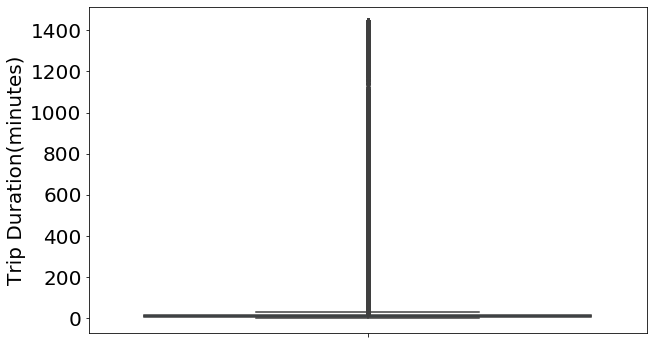

In [863]:
plt.figure(figsize = (10,6))
sns.boxplot("trip_duration", data = new_data_trip, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Trip Duration(minutes)", fontsize = 20)
plt.show()

In [864]:
# NY Authority rule the max travel is 12 hour=720min
new_data_trip = new_data_trip[(new_data_trip.trip_duration>1) & (new_data_trip.trip_duration<720)]
new_data_trip.shape[0]

8285004

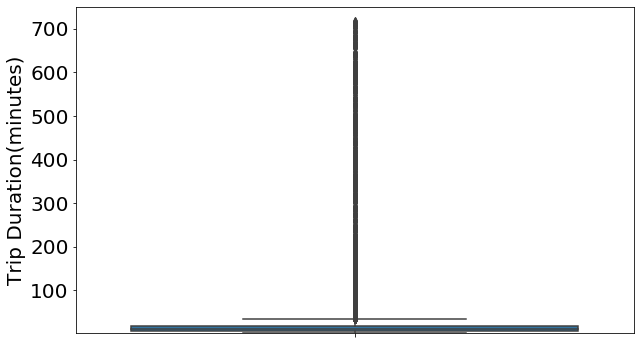

In [865]:
plt.figure(figsize = (10,6))
sns.boxplot("trip_duration", data = new_data_trip, orient = "v")
plt.ylim(ymin = 1, ymax = 750)
plt.tick_params(labelsize = 20)
plt.ylabel("Trip Duration(minutes)", fontsize = 20)
plt.show()

### Filter Based on SPEED

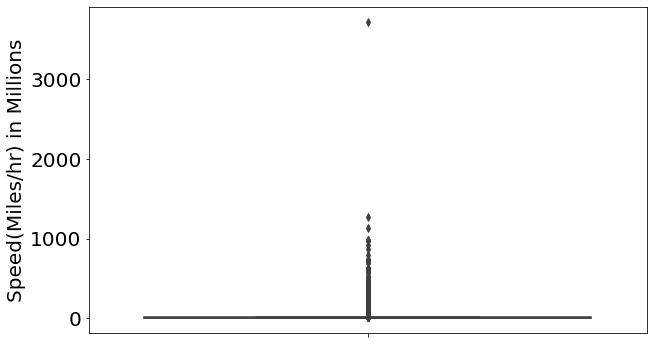

In [866]:
plt.figure(figsize = (10,6))
sns.boxplot("speed", data = new_data_trip, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Speed(Miles/hr) in Millions", fontsize = 20)
plt.show()

In [867]:
quantile_speed = new_data_trip.speed.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [868]:
qValues = np.round(np.arange(0.00, 1.01, 0.1), 4)
for i in qValues:
    print("{}th percentile value of speed is {}miles/hr".format(int(i*100), quantile_speed[i]))

0th percentile value of speed is 0.0miles/hr
10th percentile value of speed is 5.176859504132231miles/hr
20th percentile value of speed is 6.436233611442193miles/hr
30th percentile value of speed is 7.461139896373057miles/hr
40th percentile value of speed is 8.433566433566433miles/hr
50th percentile value of speed is 9.435483870967742miles/hr
60th percentile value of speed is 10.54242928452579miles/hr
70th percentile value of speed is 11.868131868131869miles/hr
80th percentile value of speed is 13.664233576642337miles/hr
90th percentile value of speed is 16.860759493670887miles/hr
100th percentile value of speed is 3717.8350515463912miles/hr


In [869]:
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("{} percentile value of speed is {}miles/hr".format(int(i*100), quantile_speed[i]))

91 percentile value of speed is 17.370629370629366miles/hr
92 percentile value of speed is 17.951482479784367miles/hr
93 percentile value of speed is 18.620689655172413miles/hr
94 percentile value of speed is 19.40869565217391miles/hr
95 percentile value of speed is 20.35059009460534miles/hr
96 percentile value of speed is 21.523463957936784miles/hr
97 percentile value of speed is 23.05990783410138miles/hr
98 percentile value of speed is 25.186558722933228miles/hr
99 percentile value of speed is 28.836967432408677miles/hr
100 percentile value of speed is 3717.8350515463912miles/hr


In [870]:
qValues = np.round(np.arange(0.9991, 1.000, 0.0001), 4)
quantile_speed = new_data_trip.speed.quantile(qValues)
for i in qValues:
    print("{} percentile value of speed is {}miles/hr".format((i*100), quantile_speed[i]))

99.91 percentile value of speed is 40.73065919714545miles/hr
99.92 percentile value of speed is 41.21554663101015miles/hr
99.92999999999999 percentile value of speed is 41.806451612903224miles/hr
99.94 percentile value of speed is 42.426301991454466miles/hr
99.95 percentile value of speed is 43.15101380818563miles/hr
99.96000000000001 percentile value of speed is 44.04282622442941miles/hr
99.97 percentile value of speed is 45.18660921630141miles/hr
99.98 percentile value of speed is 46.75324625893937miles/hr
99.99 percentile value of speed is 50.71993192059371miles/hr
100.0 percentile value of speed is 3717.8350515463912miles/hr


In [871]:
new_data_trip = new_data_trip[(new_data_trip.speed>0) & (new_data_trip.speed<50)]
new_data_trip.shape[0]

8276981

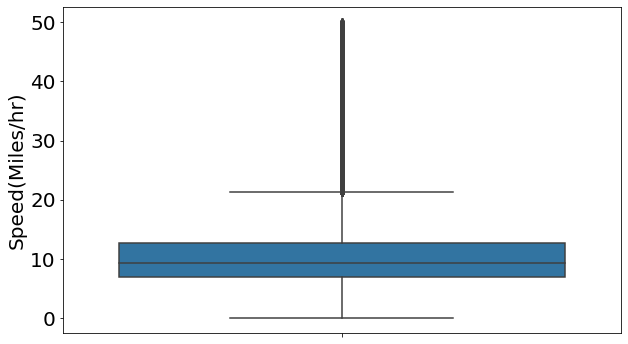

In [872]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot("speed", data = new_data_trip, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Speed(Miles/hr)", fontsize = 20)
plt.show()

In [873]:
Average_speed = sum(new_data_trip.speed)/len(new_data_trip.speed)
print("Average Speed of Taxis around NYC = "+str(Average_speed))

Average Speed of Taxis around NYC = 10.46696763542276


In [874]:
print("Speed of Taxis around NYC per 10 minutes = "+str(Average_speed/6)+" per 10 minutes.")

Speed of Taxis around NYC per 10 minutes = 1.7444946059037933 per 10 minutes.


### Filter Based on Trip Distance

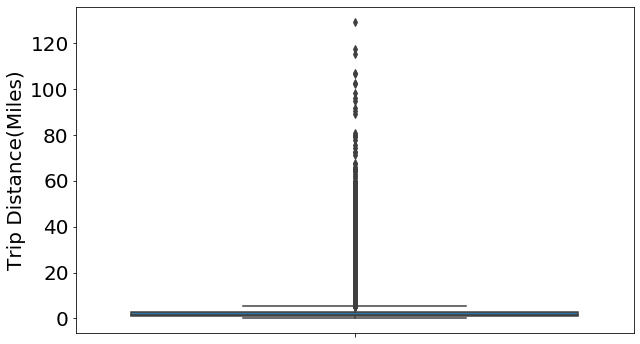

In [875]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot("trip_distance", data = new_data_trip, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Trip Distance(Miles)", fontsize = 20)
plt.show()

In [876]:
quantile_tripDistance = new_data_trip.trip_distance.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [877]:
qValues = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in qValues:
    print("{}th percentile value of trip distance is {}miles".format(int(i*100), quantile_tripDistance[i]))

0th percentile value of trip distance is 0.01miles
10th percentile value of trip distance is 0.62miles
20th percentile value of trip distance is 0.85miles
30th percentile value of trip distance is 1.07miles
40th percentile value of trip distance is 1.3miles
50th percentile value of trip distance is 1.57miles
60th percentile value of trip distance is 1.9miles
70th percentile value of trip distance is 2.37miles
80th percentile value of trip distance is 3.11miles
90th percentile value of trip distance is 4.9miles
100th percentile value of trip distance is 129.28miles


In [878]:
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("{} percentile value of trip distance is {}miles".format(int(i*100), quantile_tripDistance[i]))

91 percentile value of trip distance is 5.23miles
92 percentile value of trip distance is 5.6miles
93 percentile value of trip distance is 6.07miles
94 percentile value of trip distance is 6.6miles
95 percentile value of trip distance is 7.34miles
96 percentile value of trip distance is 8.4miles
97 percentile value of trip distance is 9.67miles
98 percentile value of trip distance is 11.39miles
99 percentile value of trip distance is 16.49miles
100 percentile value of trip distance is 129.28miles


In [879]:
quantile_tripDistance = new_data_trip.trip_distance.quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of trip distance is {}miles".format((i*100), quantile_tripDistance[i]))

99.1 percentile value of trip distance is 16.8miles
99.2 percentile value of trip distance is 17.1miles
99.3 percentile value of trip distance is 17.37miles
99.4 percentile value of trip distance is 17.69miles
99.5 percentile value of trip distance is 18.05miles
99.6 percentile value of trip distance is 18.59miles
99.7 percentile value of trip distance is 19.3miles
99.8 percentile value of trip distance is 20.2miles
99.9 percentile value of trip distance is 21.66miles
100.0 percentile value of trip distance is 129.28miles


In [880]:
new_data_trip = new_data_trip[(new_data_trip.trip_distance>0) & (new_data_trip.trip_distance<30)]
new_data_trip.shape[0]

8275841

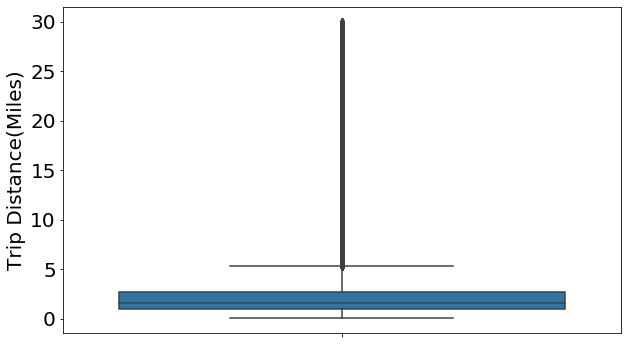

In [881]:
#plot of trip distance after removing outlier points
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot("trip_distance", data = new_data_trip, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Trip Distance(Miles)", fontsize = 20)
plt.show()

### Filter based on Total Fare

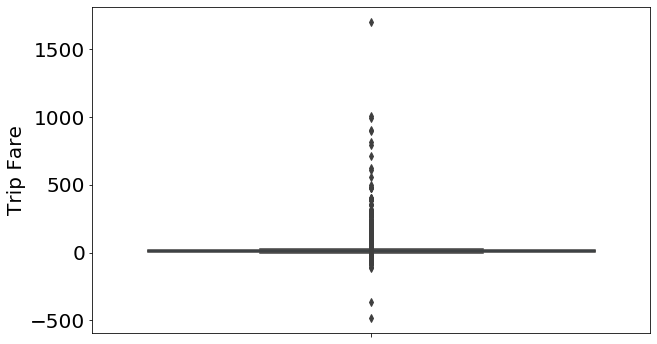

In [882]:
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot("total_amount", data = new_data_trip, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Trip Fare", fontsize = 20)
plt.show()

In [883]:
quantile_totalAmount = new_data_trip.total_amount.quantile(np.round(np.arange(0.00, 1.01, 0.01), 2))

In [884]:
qValues = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in qValues:
    print("{}th percentile value of trip fare is {}".format(int(i*100), quantile_totalAmount[i]))

0th percentile value of trip fare is -485.8
10th percentile value of trip fare is 6.8
20th percentile value of trip fare is 7.85
30th percentile value of trip fare is 9.12
40th percentile value of trip fare is 10.3
50th percentile value of trip fare is 11.75
60th percentile value of trip fare is 13.3
70th percentile value of trip fare is 15.35
80th percentile value of trip fare is 18.36
90th percentile value of trip fare is 24.44
100th percentile value of trip fare is 1702.8


In [885]:
qValues = np.round(np.arange(0.91, 1.01, 0.01), 3)
for i in qValues:
    print("{} percentile value of trip fare is {}".format(int(i*100), quantile_totalAmount[i]))

91 percentile value of trip fare is 25.56
92 percentile value of trip fare is 26.76
93 percentile value of trip fare is 28.3
94 percentile value of trip fare is 30.07
95 percentile value of trip fare is 32.3
96 percentile value of trip fare is 35.8
97 percentile value of trip fare is 41.06
98 percentile value of trip fare is 48.94
99 percentile value of trip fare is 63.2
100 percentile value of trip fare is 1702.8


In [886]:
quantile_totalAmount = new_data_trip.total_amount.quantile(np.round(np.arange(0.991, 1.001, 0.001), 3))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 3)
for i in qValues:
    print("{} percentile value of trip fare is {}".format((i*100), quantile_totalAmount[i]))

99.1 percentile value of trip fare is 64.17
99.2 percentile value of trip fare is 67.03
99.3 percentile value of trip fare is 69.66
99.4 percentile value of trip fare is 70.27
99.5 percentile value of trip fare is 70.27
99.6 percentile value of trip fare is 73.2
99.7 percentile value of trip fare is 77.32
99.8 percentile value of trip fare is 87.9
99.9 percentile value of trip fare is 101.32
100.0 percentile value of trip fare is 1702.8


In [887]:
new_data_trip = new_data_trip[(new_data_trip.total_amount>0) & (new_data_trip.total_amount<100)]
new_data_trip.shape[0]

8263781

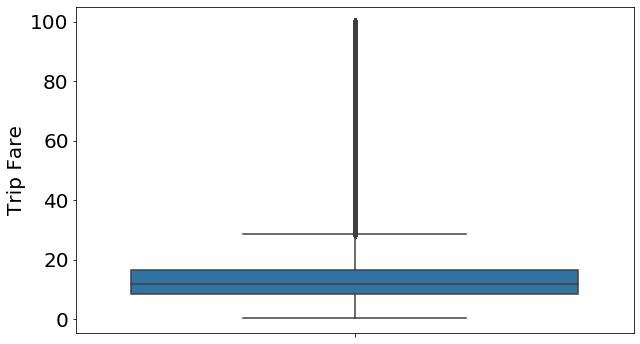

In [888]:
#plot of fare amount after removing outliers and erroneous points
fig = plt.figure(figsize = (10,6))
ax = sns.boxplot("total_amount", data = new_data_trip, orient = "v")

plt.tick_params(labelsize = 20)
plt.ylabel("Trip Fare", fontsize = 20)
plt.show()

### Fraction of points left
After removing all the erroneous points and outlier points. Points where pickups and dropoffs are outside of NYC are also removed.

In [889]:
print("Fraction of cleaned points",str(new_data_trip.shape[0]/data_trip_Manhattan.shape[0]))

Fraction of cleaned points 0.9896763861674928


In [890]:
print("Total number of outliers and erroneous points removed = ",str(data_trip_Manhattan.shape[0] - new_data_trip.shape[0]))

Total number of outliers and erroneous points removed =  86202


## Data Preparation

In [891]:
new_data_trip["PULocationID"].value_counts()

237    404188
236    358844
161    341445
162    310473
186    296460
        ...  
153       163
128        72
120        49
105        12
104         1
Name: PULocationID, Length: 68, dtype: int64

### Time Binning

In [892]:
# Time Binning
yearStart = timeToUnix("2018-01-01 00:00:00")
yearEnd = timeToUnix("2019-01-01 00:00:00")
def pickup_30min_bins(dataframe, month, year):
    pickupTime = dataframe["pickup_time"].values
    unixTime = [yearStart, yearEnd]
    unix_year = unixTime[year-2018]
    time_30min_bin = [int((i - unix_year)/(30*60)) for i in pickupTime]
    dataframe["time_bin"] = np.array(time_30min_bin)
    return dataframe

In [893]:
month_2018_data = pickup_30min_bins(new_data_trip, DATA_MONTH, 2018)
month_2018_data.head()

,trip_distance,PULocationID,DOLocationID,total_amount,tpep_pickup_datetime,pickup_time,dropoff_time,trip_duration,speed,time_bin
0,1.6,230,50,11.15,2018-05-01 00:13:56,1.525105e+09,1.525105e+09,8.833333,10.867925,5760
1,1.7,263,239,10.80,2018-05-01 00:23:26,1.525105e+09,1.525106e+09,6.500000,15.692308,5760
2,2.6,239,152,14.30,2018-05-01 00:36:23,1.525106e+09,1.525107e+09,12.050000,12.946058,5761
6,3.3,114,229,16.55,2018-05-01 00:32:59,1.525106e+09,1.525107e+09,13.733333,14.417476,5761
7,1.8,162,236,10.35,2018-05-01 00:49:13,1.525107e+09,1.525107e+09,5.133333,21.038961,5761


In [894]:
print("Current Month is {}".format(DATA_MONTH))
print("Days in Month is {}".format(DATA_MONTH_DAYS))  
print("TimeBin Start is {}".format(TIME_BIN_START)) 
print("TimeBin End is {}".format(TIME_BIN_END)) 
print("TimeBin Number is {}".format(TIME_BIN_NUM)) 

Current Month is 5
Days in Month is 31
TimeBin Start is 5760
TimeBin End is 7247
TimeBin Number is 1488


In [895]:
print(month_2018_data['time_bin'].min())
print(month_2018_data['time_bin'].max())
print("There should be", round(((24*60)/30)*DATA_MONTH_DAYS) ,"unique 30 minutes time bins for the month of 2018:", DATA_MONTH)
print("Actual unique 30 minute time bins", str(len(np.unique(month_2018_data["time_bin"]))))

5760
7247
There should be 1488 unique 30 minutes time bins for the month of 2018: 5
Actual unique 30 minute time bins 1488


In [896]:
month_2018_timeBin_groupBy = month_2018_data[["PULocationID", "time_bin", "trip_distance"]].groupby(by = ["PULocationID", "time_bin"]).count()
month_2018_timeBin_groupBy.head()

trip_distance
PULocationID time_bin               
4            5760                  7
             5761                  5
             5762                  7
             5763                  1
             5764                  2

## Data Filling with ZERO
For some zones, the pickup number is ZERO in some time bins.

In [897]:
# get unique time bins
def getUniqueTimeBins(month_2018_data):
    #uniqueTimeBinLength = len(np.unique(month_2018_data["time_bin"]))
    #uniquePULoctaions = np.unique(month_2018_data["PULocationID"])

    unqiueTimeBins = []
    numZERO = 0
    for item in PU_LOC_LIST:
        timeBins = month_2018_data.loc[(month_2018_data["PULocationID"] == item), ["time_bin"]]
        timeBinsUnique = np.unique(timeBins["time_bin"])
        unqiueTimeBins.append(timeBinsUnique)
        numZERO += TIME_BIN_NUM - len(timeBinsUnique)
        #print("PULocation {}, ZERO pickup {}".format(item, (uniqueTimeBinLength - len(timeBinsUnique))))
        #print("-"*32)
    print("Total ZERO number is", numZERO)
    
    return unqiueTimeBins

In [898]:
unqiueTimeBins = getUniqueTimeBins(month_2018_data)

Total ZERO number is 11668


In [899]:
# data filling with ZERO
def fillingZERO(month_2018_data, unqiueTimeBins):
    month_2018_timeBin_groupBy = month_2018_data[["PULocationID", "time_bin", "trip_distance"]].groupby(by = ["PULocationID", "time_bin"]).count()
    numberOfPickups = month_2018_timeBin_groupBy["trip_distance"].values
    #uniqueTimeBinLength = len(np.unique(month_2018_data["time_bin"]))
    #startTimeBin = month_2018_data['time_bin'].min()
    
    index = 0
    month_2018_fillZero = []
    for item in range(len(unqiueTimeBins)):
        smoothed_bins = []
        for t in range(TIME_BIN_NUM):
            newtime = t + TIME_BIN_START
            if newtime in unqiueTimeBins[item]:
                smoothed_bins.append(numberOfPickups[index])
                index += 1
            else:
                smoothed_bins.append(0)
        month_2018_fillZero.extend(smoothed_bins)
    
    print("Total time bins number shoud equal to 67 x ", TIME_BIN_NUM, "=", len(month_2018_fillZero))
    print("ZERO number in month_2018_fillZero is:", month_2018_fillZero.count(0))
    return month_2018_fillZero

In [900]:
month_2018_fillZero = fillingZERO(month_2018_data, unqiueTimeBins)

Total time bins number shoud equal to 67 x  1488 = 101184
ZERO number in month_2018_fillZero is: 11668


# Data Output to CVS File

In [901]:
# data output to CSV file
def output2CSV(month_2018_data, month_2018_fillZero, PU_LOC_LIST, DATA_MONTH, TIME_BIN_NUM, TIME_BIN_START):    
    startDate = datetime.strptime("2018-"+"{0:02}".format(DATA_MONTH)+"-01 00:00:00", "%Y-%m-%d %H:%M:%S")

    for index in range(len(PU_LOC_LIST)):
        pickLocationID = "{0:03}".format(PU_LOC_LIST[index])
        outputData = pd.DataFrame(columns=['PULocationID', 'PUTimeDate', 'PUTimeBin' , 'PUNum'])
        for t in range(TIME_BIN_NUM):
            currentDate = startDate + timedelta(minutes=30*t)
            currentTimeBin = TIME_BIN_START + t
            currentPickup = month_2018_fillZero[index*TIME_BIN_NUM+t]
            outputData = outputData.append(pd.Series([pickLocationID, currentDate, currentTimeBin ,currentPickup], index=outputData.columns), ignore_index=True)
        outputFileName = "2018_"+str(pickLocationID)+"_"+"{0:02}".format(DATA_MONTH)+".csv"
        outputFilePath = os.path.join("/home/qilibj/github/nyc-tlc-trip-predition/clean",outputFileName)
        print(outputFilePath)
        outputData.to_csv(outputFilePath, index=False)

In [902]:
output2CSV(month_2018_data, month_2018_fillZero, PU_LOC_LIST, DATA_MONTH, TIME_BIN_NUM, TIME_BIN_START)

/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_004_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_012_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_013_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_024_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_041_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_042_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_043_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_045_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_048_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_050_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_068_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_074_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_075_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_079_05.csv
/home/qilibj/github/nyc-tlc-trip-predition/clean/2018_087_05.csv
/home/qilibj/github/nyc-t